In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import seaborn as sns
from scipy.interpolate import (
    CubicSpline,
)


In [6]:
# Import the original glacier mass balance dataset
dfOriginal = pd.read_csv('C:/Users/Stefa/OneDrive/Documents/NumericalComputationProject/data/DOI-WGMS-FoG-2025-02/data/front_variation.csv')
dfOriginal = pd.DataFrame(dfOriginal)
# Display the original data's information
dfOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49882 entries, 0 to 49881
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  49882 non-null  object 
 1   glacier_name             49882 non-null  object 
 2   glacier_id               49882 non-null  int64  
 3   series_id                49882 non-null  int64  
 4   begin_date               49105 non-null  object 
 5   begin_date_unc           49105 non-null  float64
 6   end_date                 49882 non-null  object 
 7   end_date_unc             49882 non-null  float64
 8   length_change            46061 non-null  float64
 9   length_change_unc        6979 non-null   float64
 10  length_change_direction  4552 non-null   object 
 11  end_platform             14477 non-null  object 
 12  end_method               15336 non-null  object 
 13  investigators            20600 non-null  object 
 14  agencies              

In [7]:
# Filter the dataframe to include only the glaciers in the US
dfUS = dfOriginal[dfOriginal['country'] == 'US']

# Display the head of the US dataframe
print(dfUS.head())

# Print distinct glaciers in the US dataset
print("\nUS Glaciers: \n", dfUS['glacier_name'].unique())

      country glacier_name  glacier_id  series_id  begin_date  begin_date_unc  \
48287      US        ADAMS        4569          0  1879-07-02           182.0   
48288      US        ADAMS        4569          0  1892-07-01           182.5   
48289      US        ADAMS        4569          0  1906-07-02           182.0   
48290      US        ADAMS        4569          0  1929-07-02           182.0   
48291      US        AHTNA         112          0  1957-07-02           182.0   

         end_date  end_date_unc  length_change  length_change_unc  \
48287  1892-07-01         182.5        -2900.0                NaN   
48288  1906-07-02         182.0        -5600.0                NaN   
48289  1929-07-02         182.0        -4300.0                NaN   
48290  1931-07-02         182.0         3500.0                NaN   
48291  1977-07-02         182.0          200.0                NaN   

      length_change_direction end_platform end_method investigators agencies  \
48287             

['AIALIK' 'ANCHOR' 'BEAR' 'BLUE GLACIER' 'COLUMBIA (2057)'
 'COLUMBIA (627)' 'DINGLESTADT' 'EASTON' 'HOLGATE' 'LOWER CURTIS' 'MCCALL'
 'MCCARTY' 'MUIR' 'NISQUALLY' 'NORTHEASTERN' 'NORTHWESTERN' 'OGIVE'
 'PEDERSEN' 'PETROF' 'PORTAGE' 'QUEETS' 'RAINBOW' 'RECONSTITUTION'
 'SHOLES' 'SOUTH CASCADE' 'SOUTH HOLGATE (EAST)' 'SOUTH HOLGATE (WEST)'
 'SOUTHWESTERN' 'SPLIT' 'SUNLIGHT' 'VALDEZ' 'WHITE' 'YALIK']


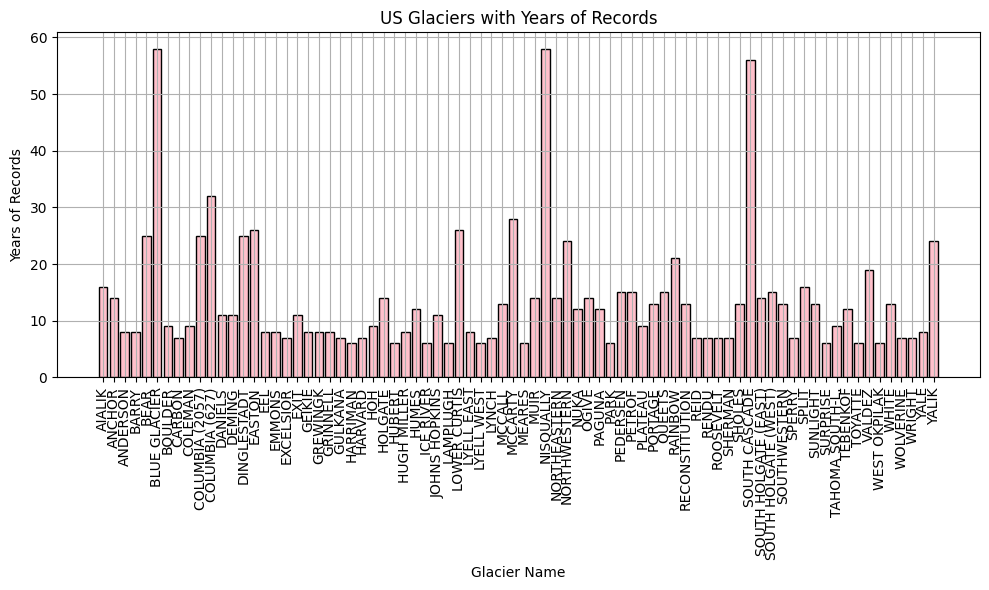

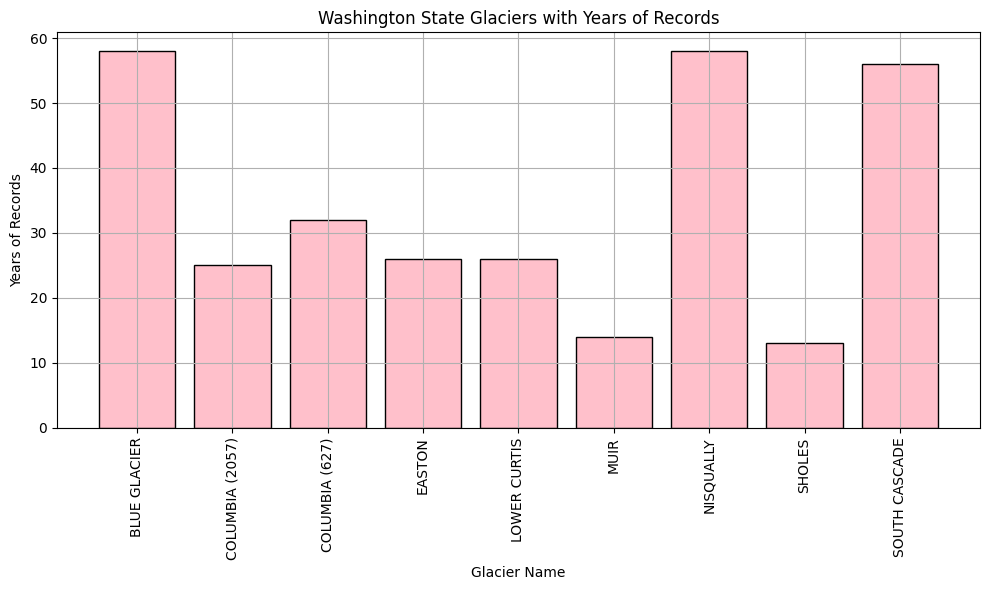

In [9]:
# This function utilizes an updated dataframe that only consists of US glaciers.
# It returns the number of years of data recorded for each glacier
def filter_glaciers(USGlacier_df):
    
    # Initialize an empty dictionary to store glacier names and their respective year counts
    glaciers_dict = {}
    
    # Iterate through each unique glacier in the US
    for glacier in USGlacier_df['glacier_name'].unique():
        
        # Calculate the sum of years of data recorded for each glacier
        years = (USGlacier_df['glacier_name'] == glacier).sum()
        
        # Append the glacier name and its respective year count to the dictionary
        glaciers_dict[glacier] = years
        
    return glaciers_dict

# Extract the US glaciers and their respective years of data recorded and store them in a dictionary
glaciers_dict = filter_glaciers(dfUS)

# Compute the mean of the years of data recorded for all US glaciers
totalYears_mean = stats.mean(glaciers_dict.values())

# Iterate through the US glacier dictionary and append glaciers to keep within the dataframe based on the
# mean of years of data recorded threshold
keepGlaciers = [glacier for glacier, years in glaciers_dict.items() if years >= totalYears_mean]

# Update the dataframe to only include glaciers that meet the threshold
dfUS = dfUS[dfUS['glacier_name'].isin(keepGlaciers)]
print(dfUS['glacier_name'].unique())

# Filter the remaining glaciers to only include those that reside in Washington State
dropGlaciers = ['AIALIK', 'ANCHOR', 'BARRY', 'BEAR','DINGLESTADT', 'EXCELSIOR', 'EXIT', 'GEIKIE',
 'GREWINGK', 'GRINNELL', 'GULKANA', 'HARRIMAN', 'HARVARD', 'HOLGATE',
 'HUBERT', 'HUGH MILLER', 'HUMES', 'ICE RIVER', 'JOHNS HOPKINS', 'LAMPLUGH',
 'LYELL EAST', 'LYELL WEST', 'MCCALL', 'MCCARTY',
 'MEARES', 'NORTHEASTERN', 'NORTHWESTERN', 'NUKA', 'OGIVE',
 'PAGUNA', 'PEDERSEN', 'PETROF', 'PLATEAU', 'PORTAGE', 'QUEETS',
 'RAINBOW', 'RECONSTITUTION', 'REID', 'RENDU', 'ROOSEVELT', 'SHERMAN',
 'SOUTH HOLGATE (EAST)', 'SOUTH HOLGATE (WEST)',
 'SOUTHWESTERN', 'SPERRY', 'SPLIT', 'SUNLIGHT', 'SURPRISE',
 'TEBENKOF', 'TOYATTE', 'VALDEZ', 'WEST OKPILAK', 'WHITE', 'WOLVERINE', 'WRIGHT',
 'YALE', 'YALIK']
dropGlaciersIndices = dfUS[dfUS['glacier_name'].isin(dropGlaciers)].index

# Create a new dataframe that excludes the glaciers that are not in Washington State
WashingtonGlaciers_df = dfUS.drop(dropGlaciersIndices)

# Extract the unique glacier names from the dataframe
WA_Glaciers = WashingtonGlaciers_df['glacier_name'].unique()

# Plot the number of years of data recorded for each US glacier in the dataset
plt.figure(figsize=(10, 6))
plt.bar(glaciers_dict.keys(), glaciers_dict.values(), color='pink', edgecolor='black')
plt.title('US Glaciers with Years of Records')
plt.xlabel('Glacier Name')
plt.xticks(rotation = 90)
plt.ylabel('Years of Records')
plt.grid(True)
plt.tight_layout()
plt.show()

# Initialize an empty list to store the years of data recorded for each glacier in Washington State
years = []

# Iterate through each WA glacier and append the years of data recorded to the list
for glacier in WA_Glaciers:
    years.append(glaciers_dict[glacier])

# Plot the number of years of data recorded for each glacier in Washington State
plt.figure(figsize=(10, 6))
plt.bar(WA_Glaciers, years, color='pink', edgecolor='black')
plt.title('Washington State Glaciers with Years of Records')
plt.xlabel('Glacier Name')
plt.xticks(rotation = 90)
plt.ylabel('Years of Records')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Stefa\AppData\Local\Temp\ipykernel_22924\4166635043.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()


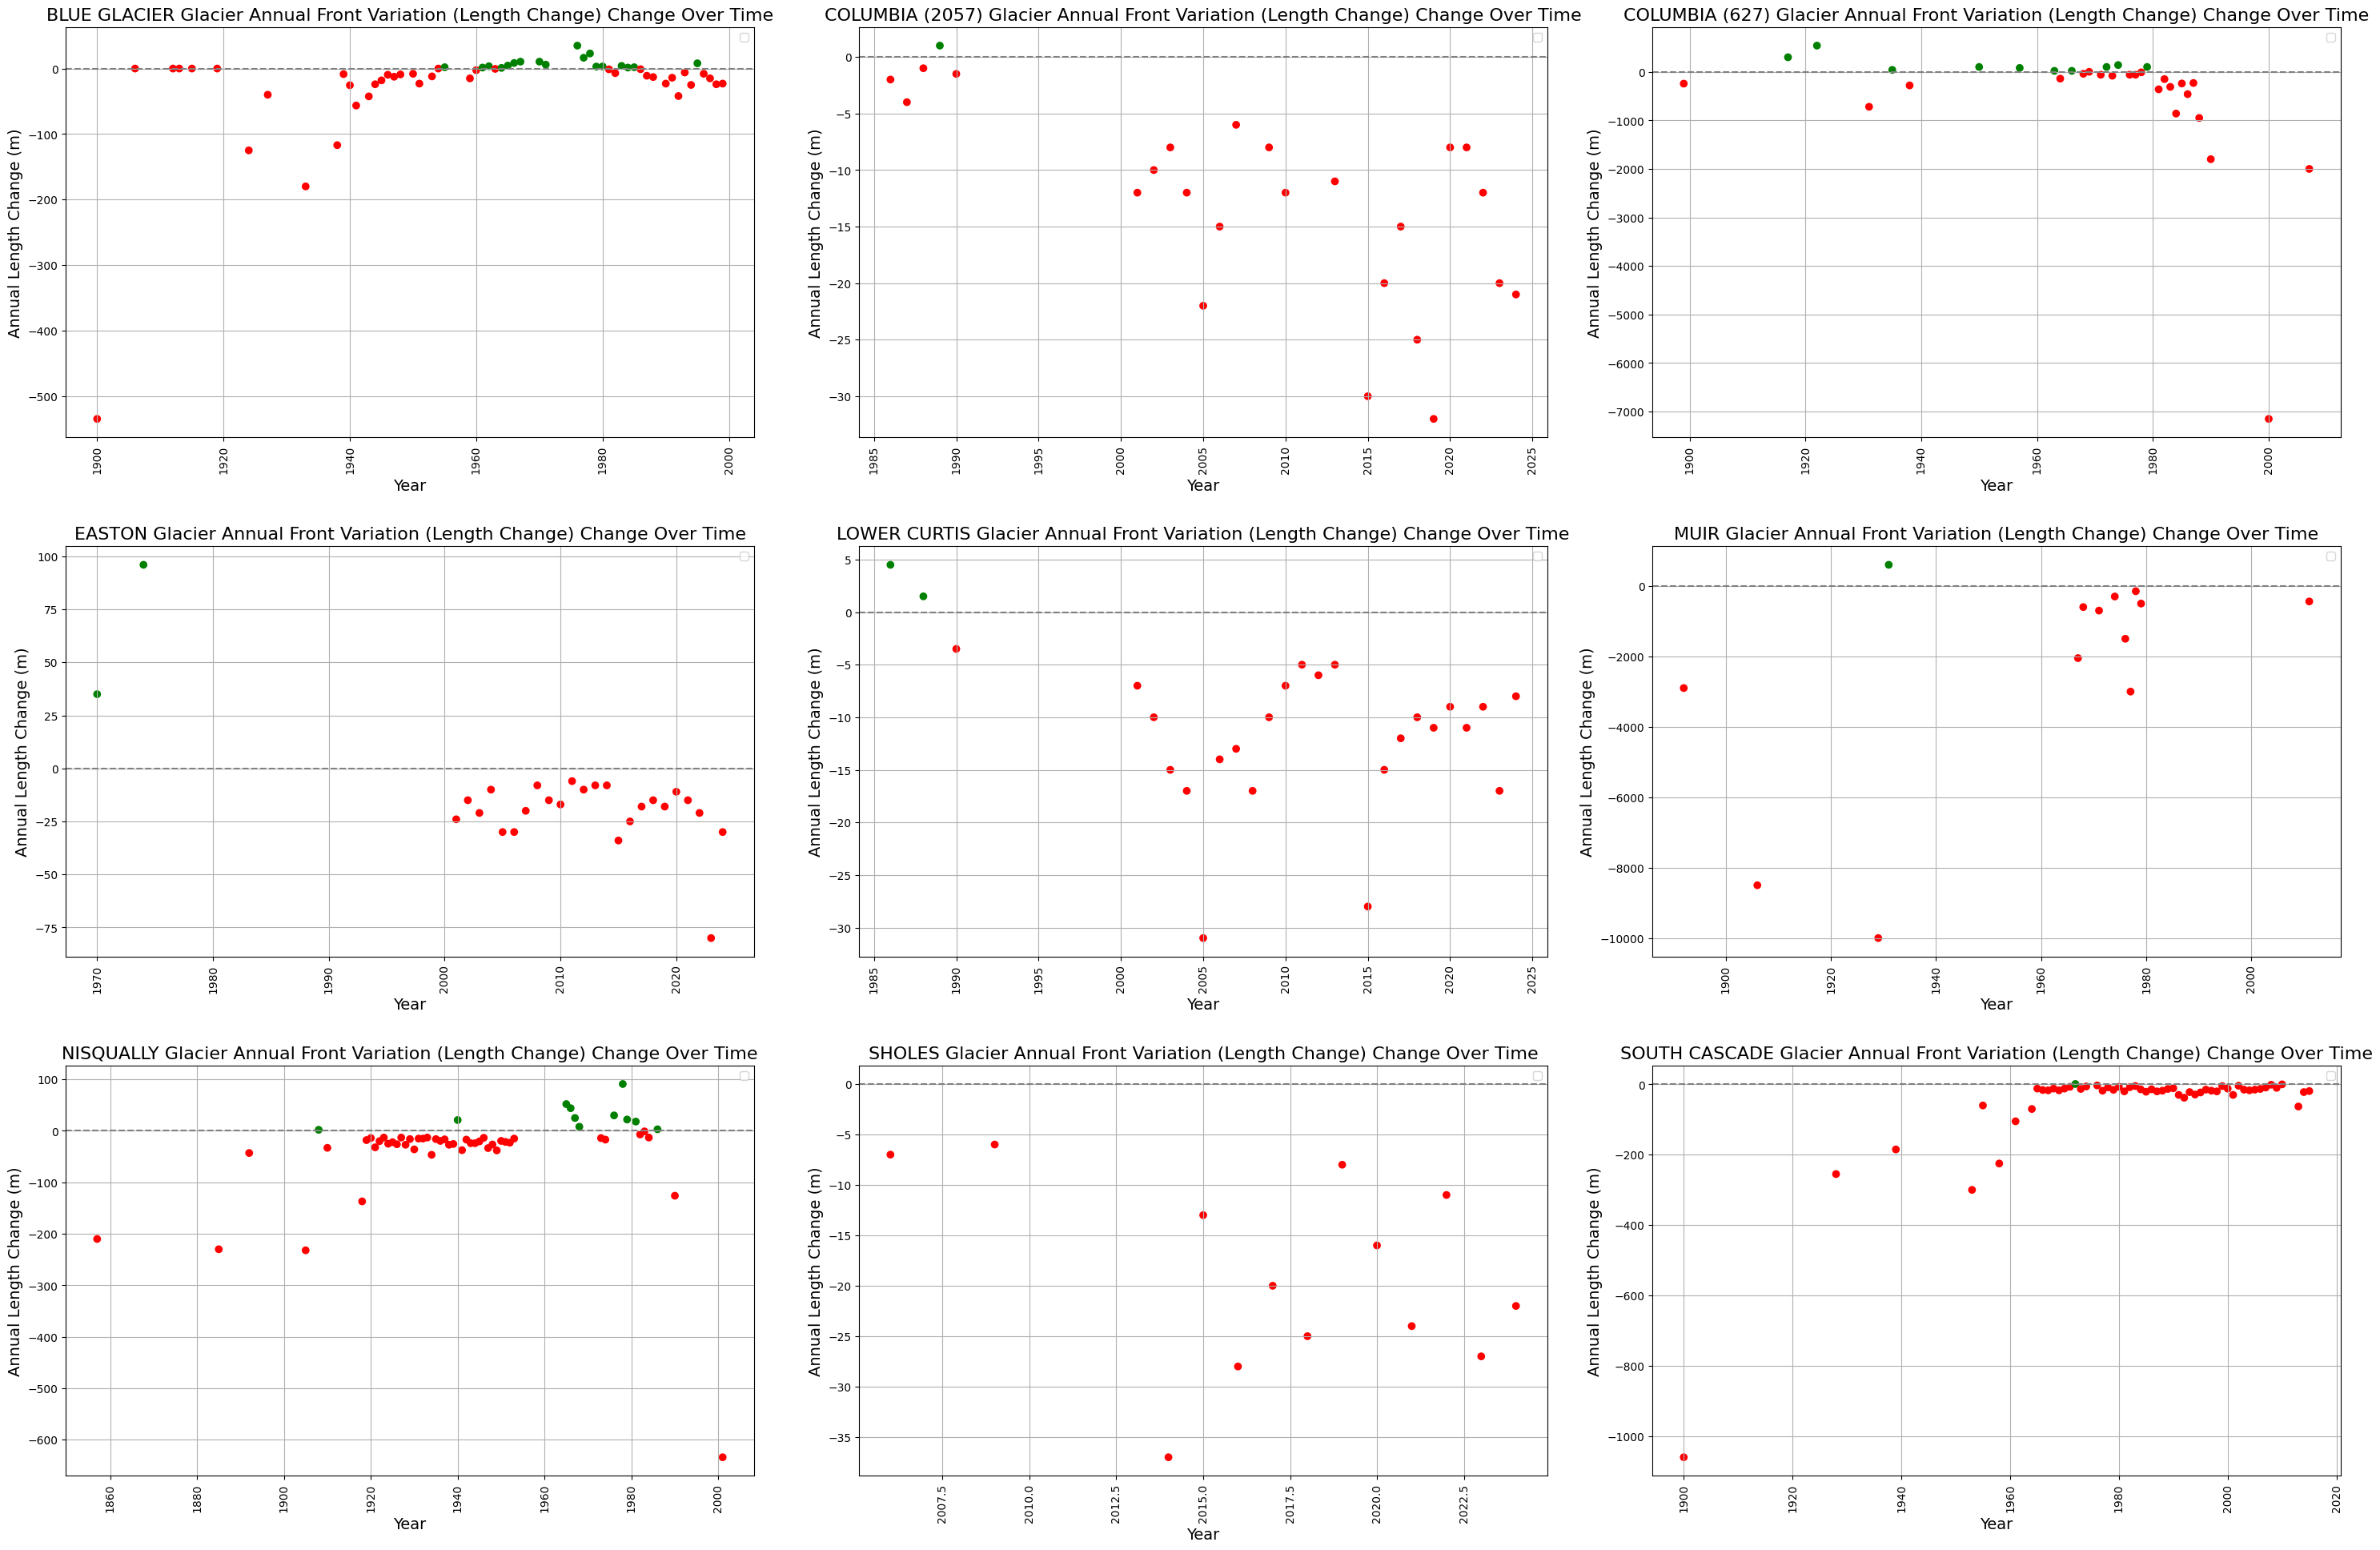

In [92]:
# Convert date to year format
WashingtonGlaciers_df['year'] = pd.to_datetime(WashingtonGlaciers_df['end_date']).dt.year

# Initialize an empty dictionary to store the x and y values for each glacier 
# x: years, y: annual mass balance
glacierXY = {}

# Iterate through each glacier in the WA_Glaciers defined above
for glacier in WA_Glaciers:

    # Filter the dataframe to only include the current glacier for automated plotting purposes
    glacier_df = WashingtonGlaciers_df[WashingtonGlaciers_df['glacier_name'] == glacier]

    # Extract the years and annual mass balance values, only for entries that are both not NaN 
    x = [year for year, lengthChange in zip(glacier_df['year'], glacier_df['length_change']) if pd.notna(year) and pd.notna(lengthChange)]
    y = [lengthChange for year, lengthChange in zip(glacier_df['year'], glacier_df['length_change']) if pd.notna(year) and pd.notna(lengthChange)]

    # Store the x and y values for each glacier in the 'glacierXY' dictionary
    glacierXY[glacier] = (x, y)

# Define the figure and axes for the subplots
fig, axes = plt.subplots(3, 3, figsize=(30, 20))
# Flatten the axes array for easier iteration
axes = axes.flatten()

# Enumerate through each glacier for plotting
for i, glacier in enumerate(glacierXY.keys()):

    # Set the x and y values for the current glacier
    x, y = glacierXY[glacier]

    # Create a color list based on the length change value: green for positive values (indicating growth); red for negative values (indicating recession)
    colors = ['green' if lengthChangeValue > 0 else 'red' for lengthChangeValue in y]

    # Plot the data for the current glacier
    axes[i].scatter(x, y, c=colors) 
    axes[i].set_title(f"{glacier} Glacier Annual Front Variation (Length Change) Change Over Time", fontsize=16) 
    axes[i].set_xlabel('Year', fontsize=14)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_ylabel('Annual Length Change (m)', fontsize=14) 
    axes[i].axhline(0, color='gray', linestyle='--')
    axes[i].legend()
    axes[i].grid(True)

# Ensure that the subplots are displayed correctly
plt.tight_layout(pad=3.0)
plt.show()


In [93]:
def numerical_differentiation(x, y):
    """
    Perform numerical differentiation using the central difference method 

    Parameters:
    - x: An array of years
    - y: An array of annual front variation values
    - n: The number of points to use for differentiation
    """

    # Initialize a list of derivatives
    derivatives = []

    # Forward differentiation for the first point
    # Compute the step-size
    h = (x[1] - x[0])
    dx = (y[1] - y[0]) / h
    derivatives.append(dx)

    # Central difference for the interior points
    for i in range(1, (len(x) - 1)):
        h = (x[i + 1] - x[i])
        dx = (y[i + 1] - y[i - 1]) / (2 * h)
        derivatives.append(dx)

    # Backward differentiation for the last point
    # Compute the step-size
    lastIndex = len(x) - 1
    h = (x[lastIndex] - x[lastIndex - 1]) 
    dx = (y[i] - y[i - 1]) / h
    derivatives.append(dx)

    return derivatives

{'BLUE GLACIER': [89.16666666666667, 44.583333333333336, 0.0, 0.0, 0.0, -12.5, -6.666666666666667, -4.583333333333333, -7.7, 85.75, 45.75, -24.0, -4.25, 16.25, 12.25, 7.25, 2.75, 0.25, 1.125, -7.0, -1.0, 11.5, 7.0, -1.875, -2.25, 8.25, 3.0, -1.0, -1.25, 2.5, 3.75, 3.0, 0.3333333333333333, -2.25, 2.45, 5.25, -6.0, -6.75, -9.9, -2.1, -5.1, 2.6, 4.25, -1.0, -1.25, -6.5, -6.0, -3.0, -0.5, -9.5, 4.0, 8.5, 7.0, 8.5, -11.5, -8.0, -4.0, -9.0], 'COLUMBIA (2057)': [-2.0, 0.5, 2.5, -0.25, -0.5909090909090909, -4.25, 2.0, -1.0, -7.0, -1.5, 8.0, 1.75, -3.0, -0.5, -4.5, -4.5, 7.5, -2.5, -8.5, 8.5, 12.0, -2.0, -6.0, -4.5, -8.0], 'COLUMBIA (627)': [30.166666666666668, 78.3, -56.666666666666664, -62.5, 73.33333333333333, 2.5, 25.714285714285715, -6.666666666666667, -110.0, 0.0, 25.0, -10.0, -5.0, 50.0, -10.0, 20.0, 5.0, -100.0, 25.0, 80.0, -87.5, -125.0, 25.0, -355.0, 35.0, 200.0, 5.0, -245.0, -392.5, -310.0, -14.285714285714286, -764.2857142857143], 'EASTON': [15.25, -1.0925925925925926, -55.5, 1.5, 2

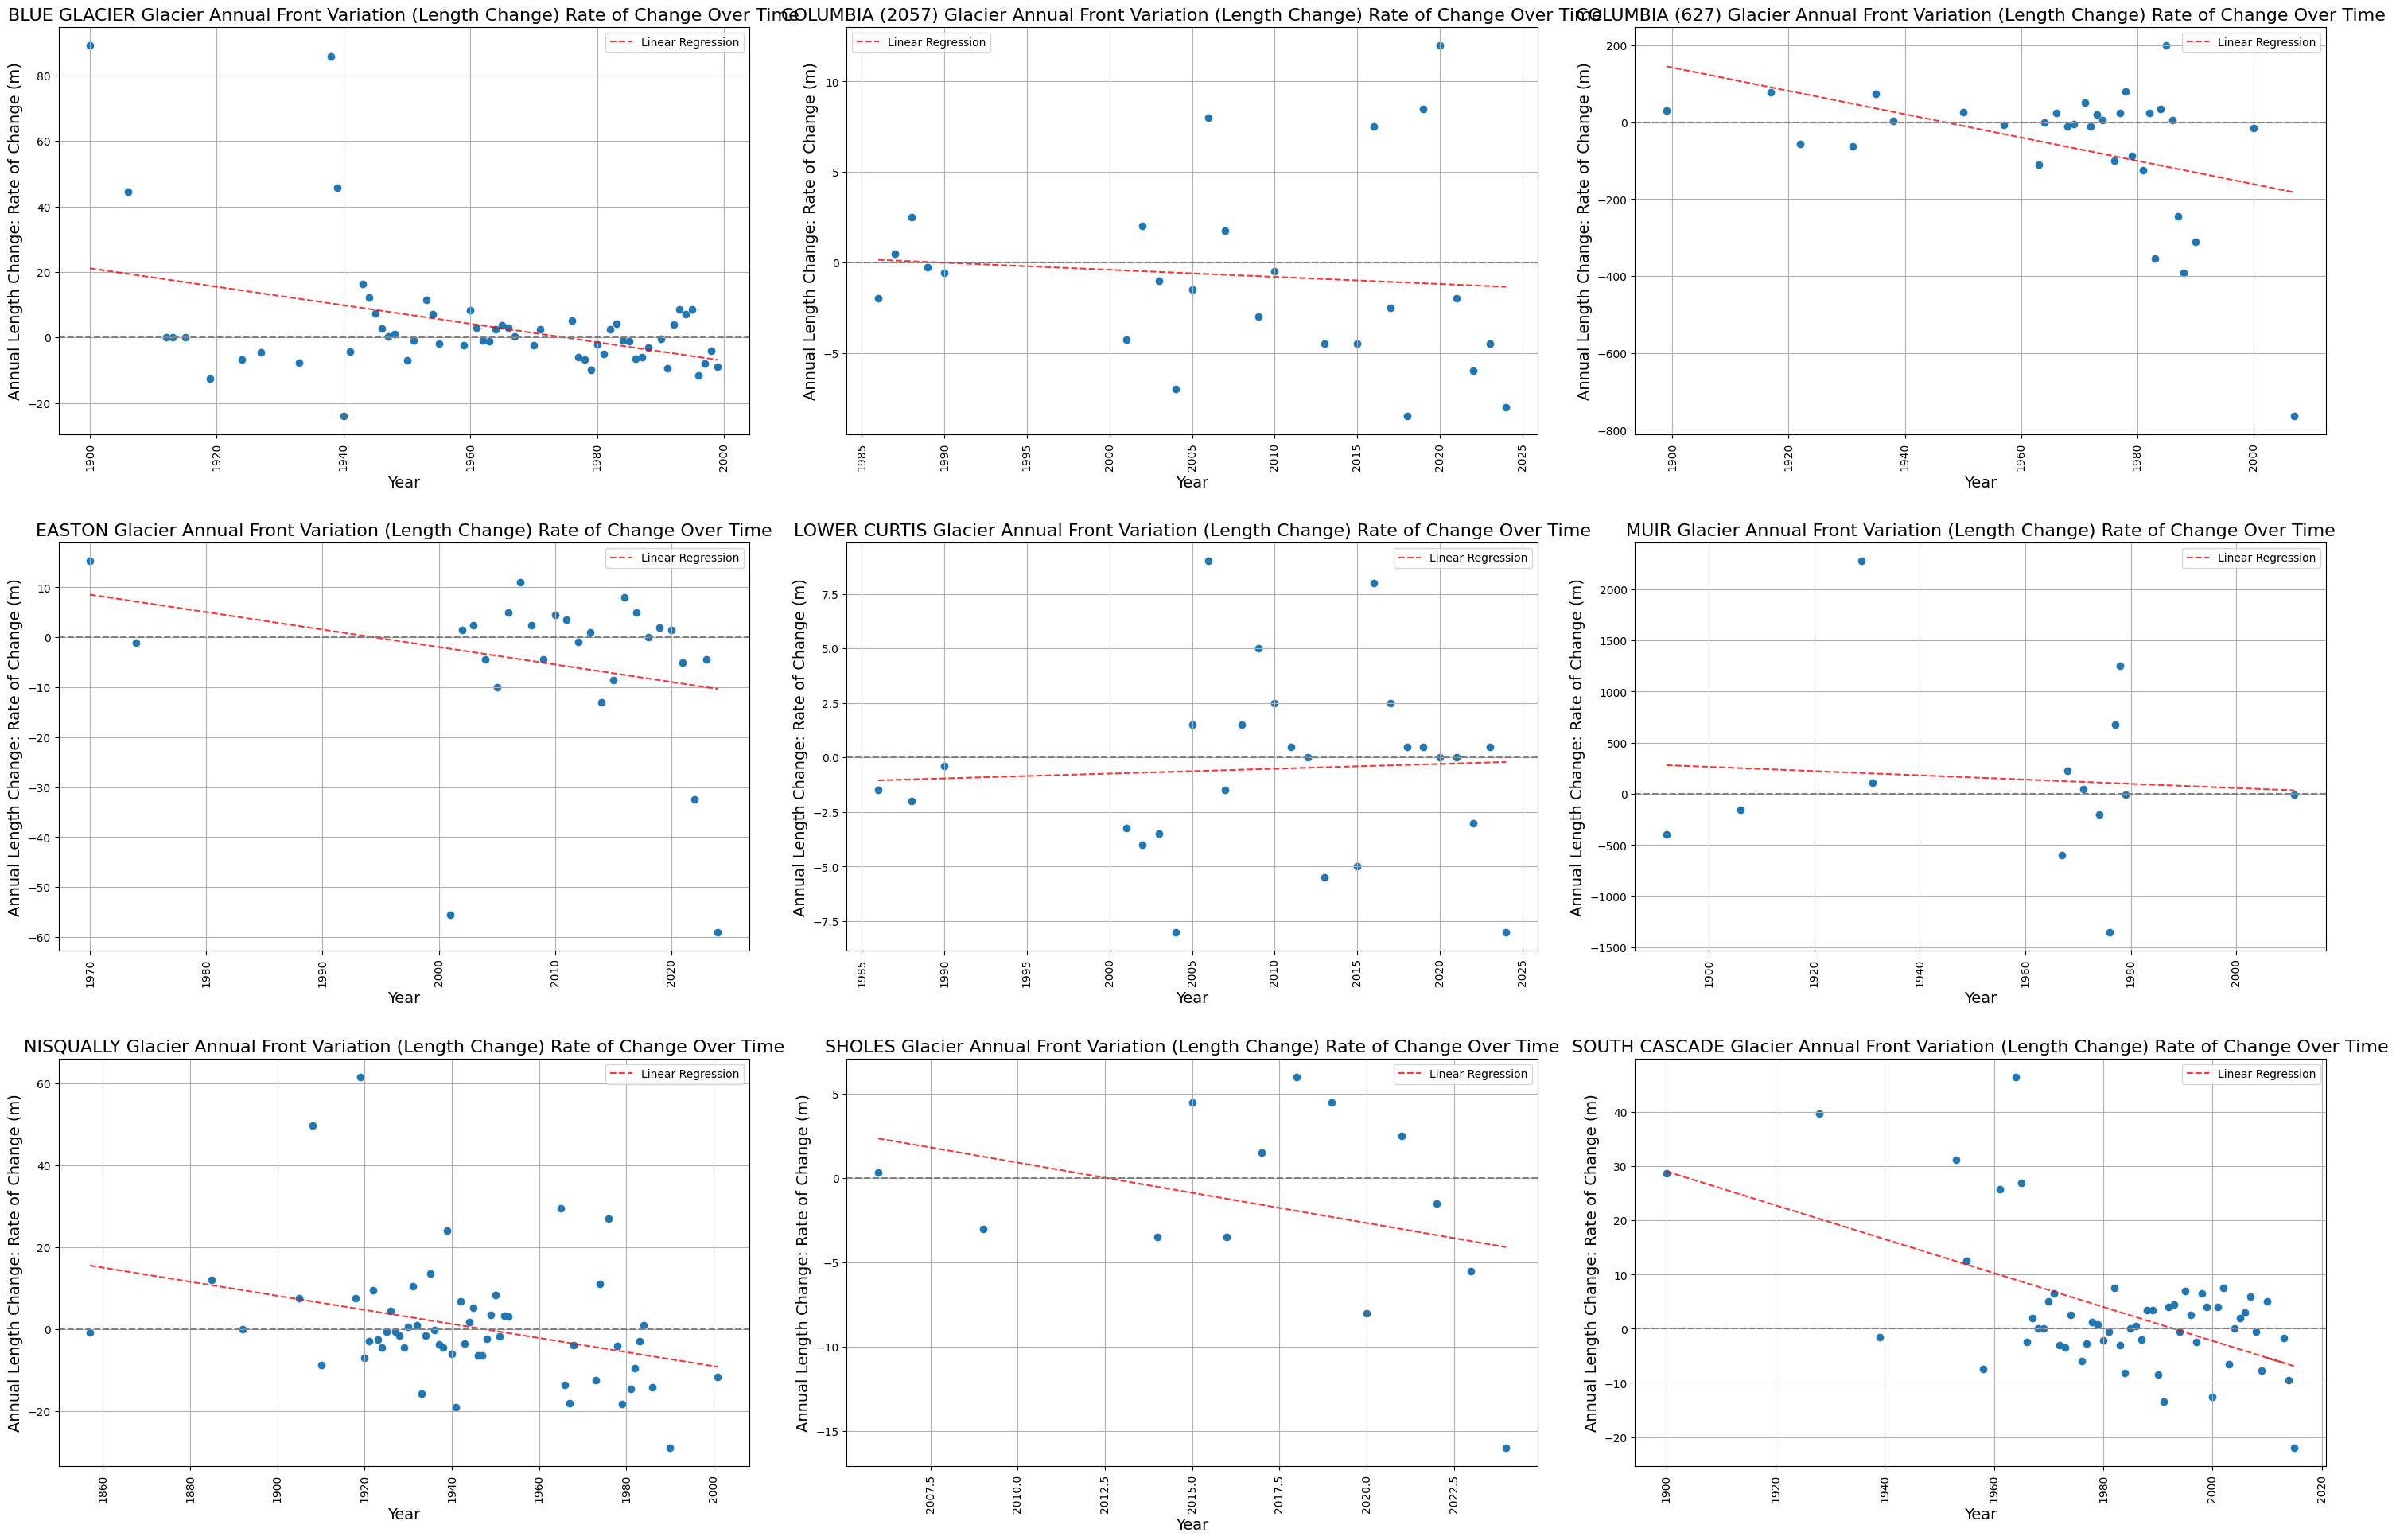

In [94]:
# Initialize an empty list to store the derivatives for each glacier
glacierDerivatives = {}

# Enumerate through each glacier for plotting
for glacier in (glacierXY.keys()):

    # Set the x and y values for the current glacier
    x, y = glacierXY[glacier]

    # Compute the numerical derivatives for the current glacier
    derivatives = (numerical_differentiation(x,y))

    # Append the glacier name and its respective derivatives to the list
    glacierDerivatives[glacier] = derivatives

print(glacierDerivatives)


# Define the figure and axes for the subplots
fig, axes = plt.subplots(3, 3, figsize=(30, 20))
# Flatten the axes array for easier iteration
axes = axes.flatten()

# Enumerate through each glacier for plotting
for i, glacier in enumerate(glacierXY.keys()):

    # Set the x and y values for the current glacier
    x, _ = glacierXY[glacier]

    # Fit a regression line for the glacier length rate of change
    slope, intercept = np.polyfit(x, glacierDerivatives[glacier], 1)

    # Generate the regression line values
    regression_line = slope * np.array(x).astype(int) + intercept

    # Plot the data for the current glacier
    axes[i].scatter(x, glacierDerivatives[glacier])
    axes[i].plot(x, regression_line, color='red', label='Linear Regression', alpha=0.8, linestyle='--')
    axes[i].set_title(f"{glacier} Glacier Annual Front Variation (Length Change) Rate of Change Over Time", fontsize=16) 
    axes[i].set_xlabel('Year', fontsize=14)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_ylabel('Annual Length Change: Rate of Change (m)', fontsize=14) 
    axes[i].axhline(0, color='gray', linestyle='--')
    axes[i].legend()
    axes[i].grid(True)

# Ensure that the subplots are displayed correctly
plt.tight_layout(pad=3.0)
plt.show()



BLUE GLACIER: (array([1900.        , 1900.14473684, 1900.28947368, 1900.43421053,
       1900.57894737, 1900.72368421, 1900.86842105, 1901.01315789,
       1901.15789474, 1901.30263158, 1901.44736842, 1901.59210526,
       1901.73684211, 1901.88157895, 1902.02631579, 1902.17105263,
       1902.31578947, 1902.46052632, 1902.60526316, 1902.75      ,
       1902.89473684, 1903.03947368, 1903.18421053, 1903.32894737,
       1903.47368421, 1903.61842105, 1903.76315789, 1903.90789474,
       1904.05263158, 1904.19736842, 1904.34210526, 1904.48684211,
       1904.63157895, 1904.77631579, 1904.92105263, 1905.06578947,
       1905.21052632, 1905.35526316, 1905.5       , 1905.64473684,
       1905.78947368, 1905.93421053, 1906.07894737, 1906.22368421,
       1906.36842105, 1906.51315789, 1906.65789474, 1906.80263158,
       1906.94736842, 1907.09210526, 1907.23684211, 1907.38157895,
       1907.52631579, 1907.67105263, 1907.81578947, 1907.96052632,
       1908.10526316, 1908.25      , 1908.39473

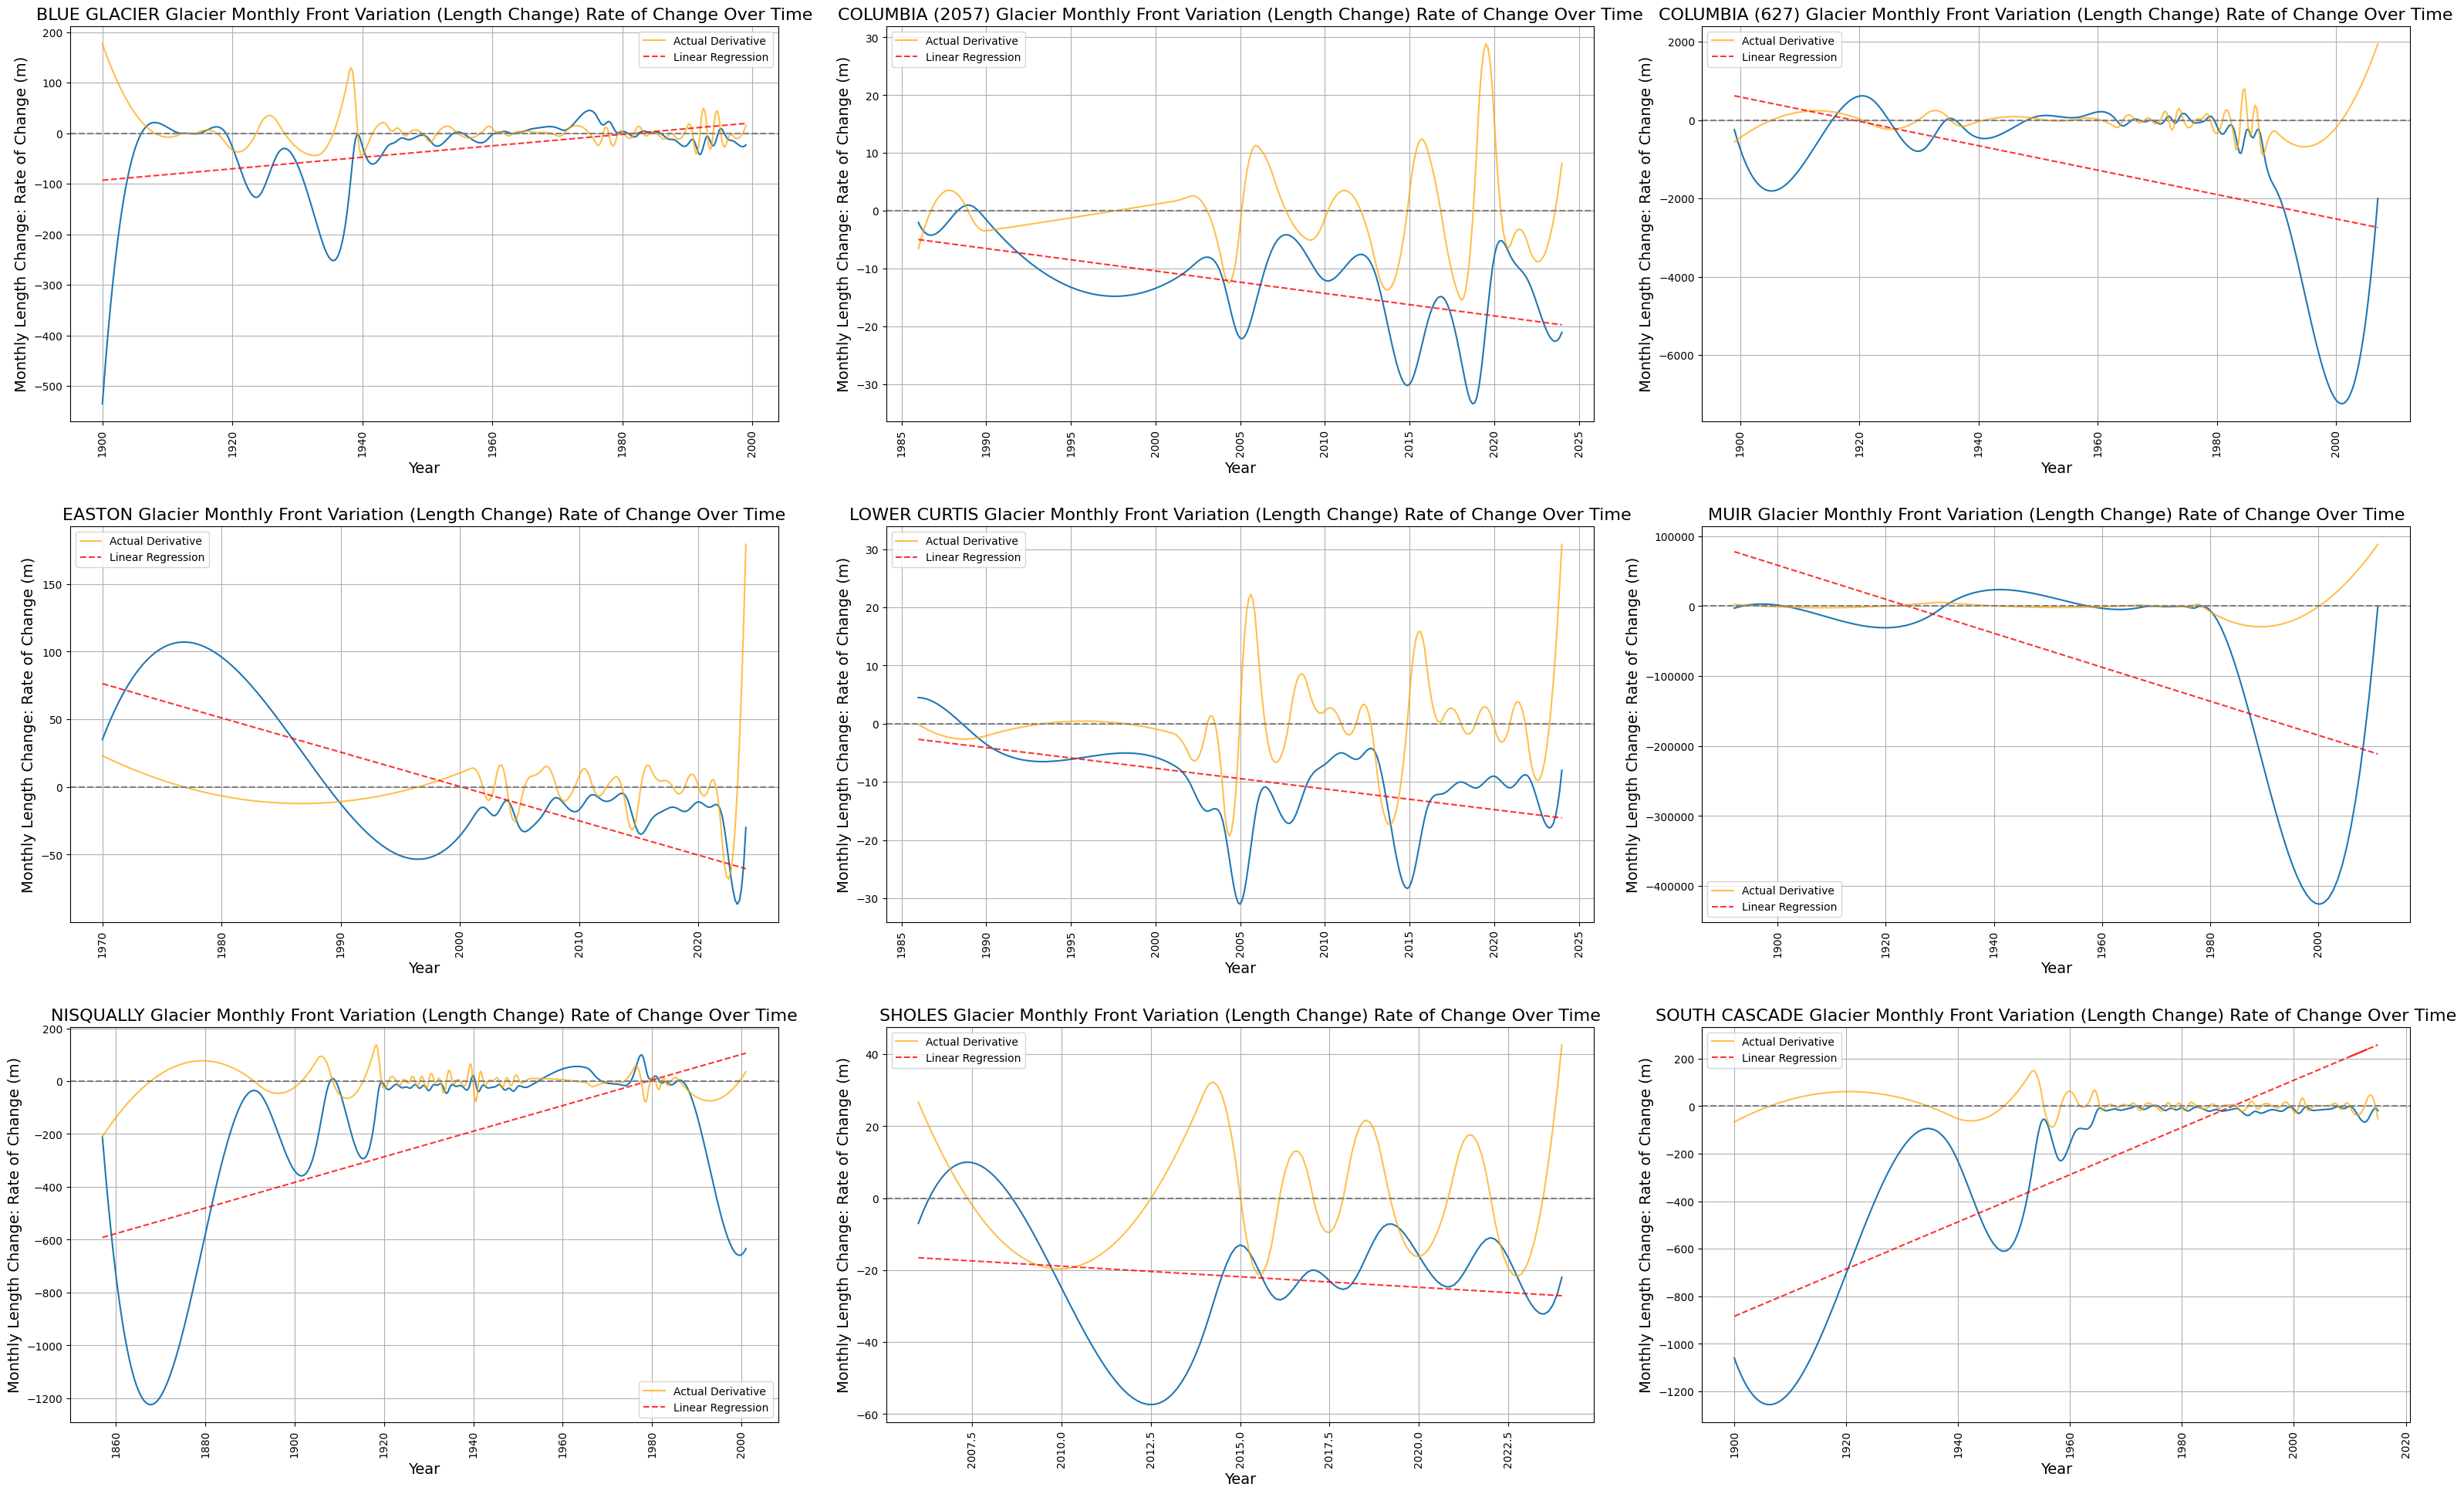

In [117]:
# Initialize an empty list to store the derivatives for each glacier
glacierDerivatives = {}
cubicSplines = {}
actualDerivatives = {}

# Enumerate through each glacier for plotting
for glacier in (glacierXY.keys()):

    # Set the x and y values for the current glacier
    x, y = glacierXY[glacier]
    #print(x, y)

    x = np.array(x)
    y = np.array(y)

    x_months = np.linspace(x[0], x[-1], (len(x) - 1) * 12 + 1 )
    #print(len(x_months))

    sorted_indices = np.argsort(x)
    x_sorted = x[sorted_indices]
    y_sorted = y[sorted_indices]
    
    cs = CubicSpline(x_sorted, y_sorted)

    y_months = cs(x_months)

    # Compute the numerical derivatives for the current glacier using a higher order of differentiation (n=12 to replicate monthly rate of change)
    derivatives = (numerical_differentiation(x_months, y_months))

    # Append the glacier name and its respective derivatives to the list
    glacierDerivatives[glacier] = derivatives
    cubicSplines[glacier] = (x_months, y_months)
    actualDerivatives[glacier] = (x_months, cs.derivative(1)(x_months))

for glacier, deriative in actualDerivatives.items():
    print(f"{glacier}: {deriative}")


# Define the figure and axes for the subplots
fig, axes = plt.subplots(3, 3, figsize=(32, 20))
# Flatten the axes array for easier iteration
axes = axes.flatten()

# Enumerate through each glacier for plotting
for i, glacier in enumerate(glacierXY.keys()):

    # Set the x and y values for the current glacier
    x, y = glacierXY[glacier]

    #print(x, y)

    # Fit a regression line for the glacier length rate of change
    slope, intercept = np.polyfit(cubicSplines[glacier][0], cubicSplines[glacier][1], 1)

    # Generate the regression line values
    regression_line = slope * np.array(x).astype(int) + intercept

    # Plot the data for the current glacier
    axes[i].plot(cubicSplines[glacier][0], cubicSplines[glacier][1])
    axes[i].plot(actualDerivatives[glacier][0], actualDerivatives[glacier][1], alpha=0.7, color='orange', label='Actual Derivative')  

    axes[i].plot(x, regression_line, color='red', label='Linear Regression', alpha=0.8, linestyle='--')
    axes[i].set_title(f"{glacier} Glacier Monthly Front Variation (Length Change) Rate of Change Over Time", fontsize=16) 
    axes[i].set_xlabel('Year', fontsize=14)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_ylabel('Monthly Length Change: Rate of Change (m)', fontsize=14) 
    axes[i].axhline(0, color='gray', linestyle='--')
    axes[i].legend()
    axes[i].grid(True)

# Ensure that the subplots are displayed correctly
plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
def numerical_differentiation(x, y):
    """
    Perform numerical differentiation using the central difference method.
    """
    # Create a CubicSpline object for interpolation
    cs = CubicSpline(x, y, bc_type='natural')
    
    # Calculate the derivative of the spline
    derivative = cs.derivative()
    
    # Evaluate the derivative at the original x values
    dy_dx = derivative(x)
    
    return dy_dx